In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Plot Hopf bifurcation as in Exercise 4

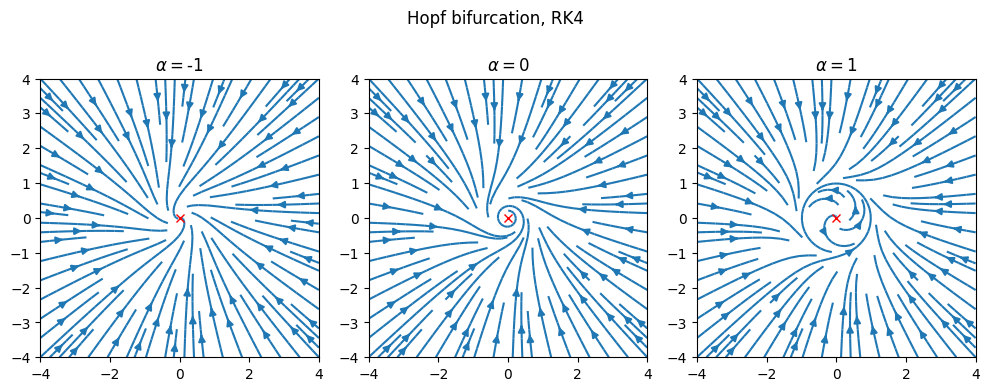

In [132]:
fig = plt.figure(figsize=(10, 4))
axs = fig.subplots(1, 3)

method = 'RK4'
fig.suptitle(f'Hopf bifurcation, {method}')

for i, alpha in enumerate([-1, 0, 1]):
    data = np.loadtxt(f'{method}_Hopf_VectorField/results_{alpha}.txt')
    data_ = np.hsplit(data, 6)
    positions = data_[0]
    vectors = data_[-1]

    r = np.linalg.norm(data_[2], axis=1)
    vectors_normalized = np.vstack((vectors[:, 0]/r, vectors[:, 1]/r))

    axs[i].streamplot(*[x.reshape((100, 100)) for x in positions.T], *[x.reshape((100, 100)) for x in vectors_normalized])
    axs[i].plot(0, 0, 'rx')
    axs[i].axis('square')
    axs[i].set_title(rf'$\alpha=${alpha}')
    axs[i].set_xlim(-4, 4)
    axs[i].set_ylim(-4 ,4)

fig.tight_layout()
fig.savefig(f'Hopf_{method}.png')

## Plot Hopf trajectory

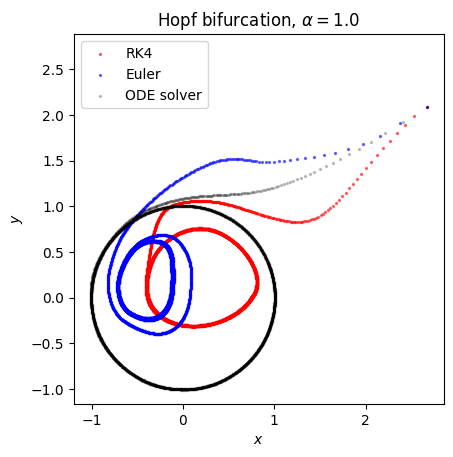

In [136]:
test_no = 2

single_test_nn_rk4 = np.loadtxt(f'RK4_Hopf_SingleTrajectory/Test_{test_no}/single_test_nn.txt')
single_test_nn_euler = np.loadtxt(f'Euler_Hopf_SingleTrajectory/Test_{test_no}/single_test_nn.txt')
single_test_odesolver = np.loadtxt(f'RK4_Hopf_SingleTrajectory/Test_{test_no}/single_test_odesolver.txt')

df = pd.read_csv('RK4_Hopf_SingleTrajectory/Test_0.txt', skiprows=1, sep=' ',
                 names=['k','x_0','y_0','alpha'])

df_test = df[df.k == test_no]

x0 = df_test.x_0.iloc[0]
y0 = df_test.y_0.iloc[0]
alpha = df_test.alpha.iloc[0]

plt.figure()
plt.scatter(*single_test_nn_rk4.T, c='red', alpha=0.5, s=2, label='RK4')
plt.scatter(*single_test_nn_euler.T, c='blue', alpha=0.5, s=2, label='Euler')
plt.scatter(*single_test_odesolver.T, c='black', alpha=0.2, s=2, label='ODE solver')
plt.axis('square')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.title(rf'Hopf bifurcation, $\alpha={alpha}$')
plt.savefig(f'Hopf_{test_no}.png')

## Plot Lorenz trajectory

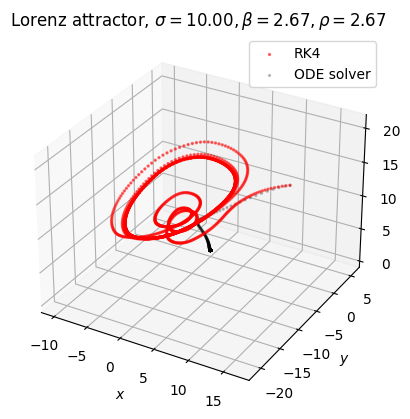

In [156]:
test_no = 1

single_test_nn_rk4 = np.loadtxt(f'RK4_Lorenz/Test_{test_no}/single_test_nn.txt')
single_test_nn_euler = np.loadtxt(f'Euler_Lorenz/Test_{test_no}/single_test_nn.txt')
single_test_odesolver = np.loadtxt(f'RK4_Lorenz/Test_{test_no}/single_test_odesolver.txt')

df = pd.read_csv('RK4_Lorenz/Test_0.txt', skiprows=1, sep=' ',
                 names=['k','x_0','y_0','z_0','sigma', 'beta', 'rho'])

df_test = df[df.k == test_no]

x0 = df_test.x_0.iloc[0]
y0 = df_test.y_0.iloc[0]
z0 = df_test.z_0.iloc[0]
sigma = df_test.sigma.iloc[0]
beta = df_test.beta.iloc[0]
rho = df_test.beta.iloc[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*single_test_nn_rk4.T, c='red', alpha=0.5, s=2, label='RK4')
# ax.scatter(*single_test_nn_euler.T, c='blue', alpha=0.5, s=2, label='Euler') # commented because it blows up
ax.scatter(*single_test_odesolver.T, c='black', alpha=0.2, s=2, label='ODE solver')
ax.axis('square')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()
ax.set_title(rf'Lorenz attractor, $\sigma={sigma:.2f}, \beta={beta:.2f}, \rho={rho:.2f}$')
fig.savefig(f'Lorenz_{test_no}.png')